In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd

from project_models import (LogisticHateSpeech, HateSpeechRFClassifier, LassoHateSpeech, HateSpeechXGBClassifier, 
                            KNNHateSpeechClassifier, RidgeHateSpeech, NBHateSpeechClassifier)

c:\Users\nicol\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_df = pd.read_csv("../data/train_data.csv")
test_df = pd.read_csv("../data/test_data.csv", sep=";")

X_train = train_df["text"]
y_train = train_df["label"]
X_test = test_df["comment"]
y_test = (test_df["isHate"] >= 0.25).astype(int)

In [3]:
models = [
    ("Lasso", LassoHateSpeech()),
    ("Logistic", LogisticHateSpeech()),
    ("Ridge", RidgeHateSpeech()),
    ("KNN", KNNHateSpeechClassifier()),
    ("XGBoost", HateSpeechXGBClassifier()),
    ("Random Forest", HateSpeechRFClassifier()),
    ("Gaussian Naive Bayes", NBHateSpeechClassifier())
]

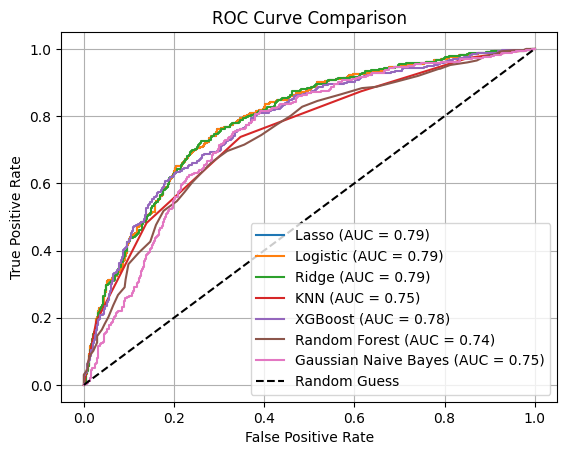

In [4]:
for name, model in models:
    model.train(X_train, y_train)
    proba = model.predict_proba(X_test)

    if isinstance(proba, pd.Series):
        proba = proba.values
    elif proba.ndim > 1:
        proba = proba[:, 1]

    fpr, tpr, _ = roc_curve(y_test, proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()